#Handle Data

In [ ]:
!pip install flashtext


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9307 sha256=195a6cdcb66dac628fca90729a7ff804f7f17d6a2f9d44503a68da6be33f49b5
  Stored in directory: /root/.cache/pip/wheels/8d/62/8b/71813348245ae1bcbae179193bbc72db819e8057e89298a6ac
Successfully built flashtext


In [ ]:
import pandas as pd
import json
import re
import numpy as np
from flashtext import KeywordProcessor

In [ ]:
from google.colab import files
files.upload()

#upload file:
#1. colloquial-indonesian-lexicon.csv
#2. Indonesian Sentiment Twitter Dataset Labeled.csv
#3. train_preprocess.tsv

In [ ]:
#Read data 1
train_df1 = pd.read_csv("/content/train_preprocess.tsv", sep='\t', names=['Tweet', 'Sentimen'], header=None)
train_df1

,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [ ]:
#Drop duplicates data 1
train_df1 = train_df1.drop_duplicates()
train_df1

,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10993,f - demokrat dorong upaya kemandirian energi n...,neutral
10994,tidak bosan,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [ ]:
#Count value (Sentimen) data 1
train_df1['Sentimen'].value_counts()

positive    6383
negative    3412
neutral     1138
Name: Sentimen, dtype: int64

In [ ]:
#Read data 2
train_df2 = pd.read_csv("/content/Indonesian Sentiment Twitter Dataset Labeled.csv", sep='\t')
train_df2

,sentimen,Tweet
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...
2,1,doa rezeki tak putus inna haa zaa larizquna ma...
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisa...
4,-1,aku tak faham betul jenis orang malaysia yang ...
...,...,...
10801,1,Jangan membandingkan kehidupanmu dengan kehidu...
10802,0,Sini uname lu ntar gua follow
10803,1,Apapun yg telah kamu lakukan apapun kesalahanm...
10804,1,3 cara untuk ingat semula apa yang kita dah ha...


In [ ]:
#Drop label positive (sentimen=1) data 2 
train_df2 = train_df2[train_df2['sentimen'] < 1]
train_df2

,sentimen,Tweet
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...
4,-1,aku tak faham betul jenis orang malaysia yang ...
5,0,barusan liat tulisan di belakang truk rela inj...
6,-1,cerita dia macam ni mamat ni hari2 aku nampak ...
...,...,...
10797,0,Jadi kita harus mkn dulu di KFC sebesar 60 rib...
10798,0,Tante kapan nikah Akun RP panggil calon istri ...
10799,-1,Pelik tengok orang zaman sekarang ni dulu kema...
10800,0,Menikah itu belum tentu harus sudah pernah pac...


In [ ]:
#Drop duplicates data 2
train_df2 = train_df2.drop_duplicates()
train_df2

,sentimen,Tweet
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...
4,-1,aku tak faham betul jenis orang malaysia yang ...
5,0,barusan liat tulisan di belakang truk rela inj...
6,-1,cerita dia macam ni mamat ni hari2 aku nampak ...
...,...,...
10797,0,Jadi kita harus mkn dulu di KFC sebesar 60 rib...
10798,0,Tante kapan nikah Akun RP panggil calon istri ...
10799,-1,Pelik tengok orang zaman sekarang ni dulu kema...
10800,0,Menikah itu belum tentu harus sudah pernah pac...


In [ ]:
#Replace label 0 to neutral and -1 to negative
train_df2['Sentimen'] = np.where(train_df2['sentimen']== 0, 'neutral', 'negative')
train_df2.drop('sentimen', axis=1, inplace=True)
train_df2

<ipython-input-12-a3964ffa0071>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df2['Sentimen'] = np.where(train_df2['sentimen']== 0, 'neutral', 'negative')
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Tweet,Sentimen
0,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,negative
1,kita lanjutkan saja diam ini hingga kau dan ak...,negative
4,aku tak faham betul jenis orang malaysia yang ...,negative
5,barusan liat tulisan di belakang truk rela inj...,neutral
6,cerita dia macam ni mamat ni hari2 aku nampak ...,negative
...,...,...
10797,Jadi kita harus mkn dulu di KFC sebesar 60 rib...,neutral
10798,Tante kapan nikah Akun RP panggil calon istri ...,neutral
10799,Pelik tengok orang zaman sekarang ni dulu kema...,negative
10800,Menikah itu belum tentu harus sudah pernah pac...,neutral


In [ ]:
#Count value (sentimen) data 2
train_df2['Sentimen'].value_counts()

neutral     5084
negative    2691
Name: Sentimen, dtype: int64

In [ ]:
#Combine data 1 and data 2
train_df = pd.concat([train_df1, train_df2])
train_df

,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10797,Jadi kita harus mkn dulu di KFC sebesar 60 rib...,neutral
10798,Tante kapan nikah Akun RP panggil calon istri ...,neutral
10799,Pelik tengok orang zaman sekarang ni dulu kema...,negative
10800,Menikah itu belum tentu harus sudah pernah pac...,neutral


In [ ]:
#Count value (Sentimen) final data training
train_df['Sentimen'].value_counts()

positive    6383
neutral     6222
negative    6103
Name: Sentimen, dtype: int64

In [ ]:
def special(s):
    s = re.sub(r'\W', ' ',str(s))
    return s

def single(s):
    s = re.sub(r'\s+[a-zA-Z]\s+', ' ', s)
    return s

def singlestart(s):
    s = re.sub(r'\^[a-zA-Z]\s+', ' ', s)
    return s

def lowercase(s):
    return s.lower()

def mulspace(s):
    s = re.sub(r'\s+', ' ', s)
    return s

def rt(s):
    s = re.sub(r'rt @\w+: ', ' ', s)
    return s

def prefixedb(s):
    s = re.sub(r'^b\s+', '', s)
    return s

def misc(s):
    s = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))|([#@]\S+)|user|\n|\t', ' ', s)
    return s

def cleaning(s):
    s = special(s)
    s = single(s)
    s = singlestart(s)
    s = lowercase(s)
    s = mulspace(s)
    s = rt(s)
    s = prefixedb(s)
    s = misc(s)
    return s

In [ ]:
train_df['Tweet'] = train_df['Tweet'].apply(cleaning)
train_df

,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung tem...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh jadi mahasiswa jangan sombong dong kasih k...,negative
...,...,...
10797,jadi kita harus mkn dulu di kfc sebesar 60 rib...,neutral
10798,tante kapan nikah akun rp panggil calon istri ...,neutral
10799,pelik tengok orang zaman sekarang ni dulu kema...,negative
10800,menikah itu belum tentu harus sudah pernah pac...,neutral


In [ ]:
#Reset Index
train_df = train_df.reset_index()
train_df.drop('index', axis=1, inplace=True)
train_df

,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung tem...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh jadi mahasiswa jangan sombong dong kasih k...,negative
...,...,...
18703,jadi kita harus mkn dulu di kfc sebesar 60 rib...,neutral
18704,tante kapan nikah akun rp panggil calon istri ...,neutral
18705,pelik tengok orang zaman sekarang ni dulu kema...,negative
18706,menikah itu belum tentu harus sudah pernah pac...,neutral


In [ ]:
#Read alay dictionary
alay_dict_df = pd.read_csv('/content/colloquial-indonesian-lexicon.csv')
alay_dict_df

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0
...,...,...,...,...,...,...,...
15001,gataunya,enggak taunya,0,Ini kaya nenek2 ya beb gataunya agnezz @yugime...,akronim,0,0
15002,gtau,enggak tau,0,Stidaknya mrka may berkarya Dan berusaha yg tr...,akronim,abreviasi,0
15003,gatau,enggak tau,0,Ih gatau malu,akronim,0,0
15004,fans2,fan-fan,0,Jkt48 adalah tempat di mana sesama fans saling...,reduplikasi,naturalisasi,0


In [ ]:
alay_dict = alay_dict_df.groupby('formal')['slang'].apply(list).to_dict()

In [ ]:
#Replace Alay Word
keyword_processor = KeywordProcessor()
keyword_processor.add_keywords_from_dict(alay_dict)

def replace_alay(s):
  return keyword_processor.replace_keywords(s)

In [ ]:
train_df['Tweet'] = train_df['Tweet'].apply(replace_alay)
train_df

,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung tem...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh jadi mahasiswa jangan sombong dong kasih k...,negative
...,...,...
18703,jadi kita harus makin dulu di kfc sebesar 60 r...,neutral
18704,tante kapan nikah akun rp panggil calon istri ...,neutral
18705,pelik tengok orang zaman sekarang nih dulu kem...,negative
18706,menikah itu belum tentu harus sudah pernah pac...,neutral


In [ ]:
tweet_sentimen_count = train_df['Sentimen'].value_counts()
tweet_sentimen_count = pd.DataFrame({"Sentimen":tweet_sentimen_count.index,"Total":tweet_sentimen_count.values})
tweet_sentimen_count

,Sentimen,Total
0,positive,6383
1,neutral,6222
2,negative,6103


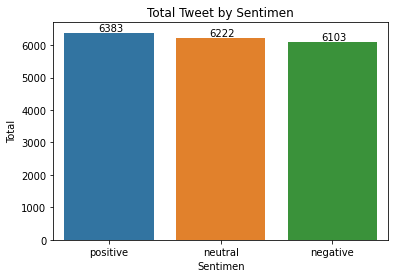

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=tweet_sentimen_count,x="Sentimen",y="Total", errwidth=0)
plt.title("Total Tweet by Sentimen")
for n in ax.patches:
        ax.annotate('{:.0f}'.format(n.get_height()), (n.get_x()+0.3, n.get_height()+62))

In [ ]:
train_df

,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung tem...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh jadi mahasiswa jangan sombong dong kasih k...,negative
...,...,...
18703,jadi kita harus makin dulu di kfc sebesar 60 r...,neutral
18704,tante kapan nikah akun rp panggil calon istri ...,neutral
18705,pelik tengok orang zaman sekarang nih dulu kem...,negative
18706,menikah itu belum tentu harus sudah pernah pac...,neutral


In [ ]:
#Download final data for training
train_df.to_csv('/content/final_data_training.csv')

from google.colab import files
files.download ("final_data_training.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#ANN

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_df['Tweet'])
X_train_counts.shape

(18708, 29083)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(18708, 29083)

In [ ]:
X = X_train_tf
y = train_df.Sentimen

In [ ]:
sentimen = {'neutral': 0, 'positive': 1, 'negative': 2}
y = y.replace(sentimen)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier

ann_model = MLPClassifier(hidden_layer_sizes=(256,128,64,36), activation="relu", random_state=42, solver="adam", alpha=0.00001, early_stopping=True, max_iter=1000, verbose=True)
ann_model.fit(X_train, y_train)

print("Training is done")

Iteration 1, loss = 0.72289930
Validation score: 0.755511
Iteration 2, loss = 0.30077638
Validation score: 0.808951
Iteration 3, loss = 0.13143537
Validation score: 0.798263
Iteration 4, loss = 0.06355706
Validation score: 0.786239
Iteration 5, loss = 0.03791874
Validation score: 0.788911
Iteration 6, loss = 0.02659029
Validation score: 0.781563
Iteration 7, loss = 0.01979240
Validation score: 0.779559
Iteration 8, loss = 0.01532704
Validation score: 0.783567
Iteration 9, loss = 0.01123983
Validation score: 0.784235
Iteration 10, loss = 0.00985948
Validation score: 0.785571
Iteration 11, loss = 0.00806584
Validation score: 0.782899
Iteration 12, loss = 0.00767501
Validation score: 0.786239
Iteration 13, loss = 0.00736821
Validation score: 0.784235
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training is done


In [ ]:
from sklearn.metrics import classification_report

test = ann_model.predict(X_test)

print("Testing is done")

print(classification_report(y_test, test))

Testing is done
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1244
           1       0.90      0.90      0.90      1277
           2       0.72      0.69      0.71      1221

    accuracy                           0.80      3742
   macro avg       0.79      0.79      0.79      3742
weighted avg       0.80      0.80      0.80      3742



In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies = []

X = X_train_tf
y = train_df.Sentimen

sentimen = {'neutral': 0, 'positive': 1, 'negative': 2}
y = y.replace(sentimen)

for iteration, data in enumerate(kf.split(X), start=1):

  X_train = X[data[0]]
  y_train = y[data[0]]

  X_test = X[data[1]]
  y_test = y[data[1]]

  ann_model = MLPClassifier(hidden_layer_sizes=(256,128,64,36), activation="relu", random_state=42, solver="adam", alpha=0.00001, early_stopping=True, max_iter=1000, verbose=True)
  ann_model.fit(X_train, y_train)

  test = ann_model.predict(X_test)

  accuracy = accuracy_score(y_test,test)

  print("Training ke-", iteration)
  print(classification_report(y_test,test))
  print("==========================================================")

  accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)

print()
print()
print("Rata-rata Accuracy:", average_accuracy)

Iteration 1, loss = 0.71378913
Validation score: 0.777555
Iteration 2, loss = 0.30702574
Validation score: 0.768871
Iteration 3, loss = 0.13515150
Validation score: 0.763527
Iteration 4, loss = 0.07017742
Validation score: 0.753507
Iteration 5, loss = 0.04218828
Validation score: 0.748831
Iteration 6, loss = 0.03135926
Validation score: 0.747495
Iteration 7, loss = 0.02077939
Validation score: 0.740815
Iteration 8, loss = 0.01431480
Validation score: 0.739479
Iteration 9, loss = 0.01370298
Validation score: 0.738811
Iteration 10, loss = 0.01008483
Validation score: 0.741483
Iteration 11, loss = 0.00748481
Validation score: 0.745491
Iteration 12, loss = 0.00804803
Validation score: 0.744823
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training ke- 1
              precision    recall  f1-score   support

    negative       0.81      0.61      0.69      1218
     neutral       0.71      0.89      0.79      1181
    positive       0.91      0

In [ ]:
import pickle

with open('ann_model.pkl','wb') as f:
  pickle.dump(ann_model, f)

with open('count_vect.pkl','wb') as f:
  pickle.dump(count_vect, f)

with open('tf_transformer.pkl','wb') as f:
  pickle.dump(tf_transformer, f)

In [ ]:
with open('ann_model.pkl','rb') as f:
  ann_model = pickle.load(f)

with open('count_vect.pkl','rb') as f:
  count_vect = pickle.load(f)

with open('tf_transformer.pkl','rb') as f:
  tf_transformer = pickle.load(f)

In [ ]:
sent_text = "makanan"
text = [sent_text]
df_sent = pd.DataFrame(text, columns=['sent_text'])

df_sent['sent_text'] = df_sent['sent_text'].apply(cleaning)
df_sent['sent_text'] = df_sent['sent_text'].apply(replace_alay)

bow_text = count_vect.transform(df_sent['sent_text'])
tfidf_text = tf_transformer.transform(bow_text)

result = ann_model.predict(tfidf_text)[0]

print("Sent Text: ", sent_text)
print("Sentiment:")
if result == 0:
  print('neutral')
elif result == 1:
  print('positive')
else:
  print('negative')

Sent Text:  makanan
Sentiment:
negative


In [ ]:
df_csv = pd.read_csv("/content/data.csv",encoding='latin-1')
df_csv

In [ ]:
df_csv['Tweet'] = df_csv['Tweet'].apply(cleaning)
df_csv['Tweet'] = df_csv['Tweet'].apply(replace_alay)
df_csv['Tweet']

0         disaat semua cowok berusaha melacak perhatian...
1        rt     siapa yang telat mengasih tau lu edan s...
2        41 kadang aku berpikir kenapa aku tetap percay...
3            aku itu aku nku tau matamu sipit tapi dili...
4            kaum cebong kapir sudah kelihatan dongokny...
                               ...                        
13164      jangan asal mengomong ndasmu congor lu yang ...
13165                              kasur mana enak kunyuk 
13166      hati hati bisu n nlagi bosan huft xf0 x9f x9...
13167            bom yang real mudah terdeteksi bom yan...
13168      mana situ mengasih itu cuma foto ya kutil onta 
Name: Tweet, Length: 13169, dtype: object

In [ ]:
bow_text = count_vect.transform(df_csv['Tweet'])
tfidf_text = tf_transformer.transform(bow_text)

In [ ]:
result = ann_model.predict(tfidf_text)

In [ ]:
result

array([2, 0, 2, ..., 2, 0, 2])

In [ ]:
df_csv['Label'] = ann_model.predict(tfidf_text)

In [ ]:
df_csv

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Label
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,negative
1,rt siapa yang telat mengasih tau lu edan s...,0,1,0,0,0,0,0,0,0,0,0,0,neutral
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,negative
3,aku itu aku nku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,negative
4,kaum cebong kapir sudah kelihatan dongokny...,1,1,0,1,1,0,0,0,0,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal mengomong ndasmu congor lu yang ...,1,1,1,0,0,0,1,0,0,1,0,0,negative
13165,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,positive
13166,hati hati bisu n nlagi bosan huft xf0 x9f x9...,0,0,0,0,0,0,0,0,0,0,0,0,negative
13167,bom yang real mudah terdeteksi bom yan...,0,0,0,0,0,0,0,0,0,0,0,0,neutral


In [ ]:
sentimen = {0 : 'neutral', 1 : 'positive', 2: 'negative'}

In [ ]:
def mapping_result(result_prediction):
    if result_prediction == 0:
        return "neutral"
    elif  result_prediction == 1:
        return "positive"
    else:
        return "negative"

In [ ]:
df_csv['Label'] = df_csv['Label'].apply(mapping_result)